# Walmart Sales
In this comprehensive project, our primary focus will be conducting a thorough data exploratory analysis centered around Walmart's sales. Our overarching objective is to delve deep into the dataset, uncovering intricate patterns and significant trends, thereby gaining valuable insights into the dynamics of Walmart's sales landscape.

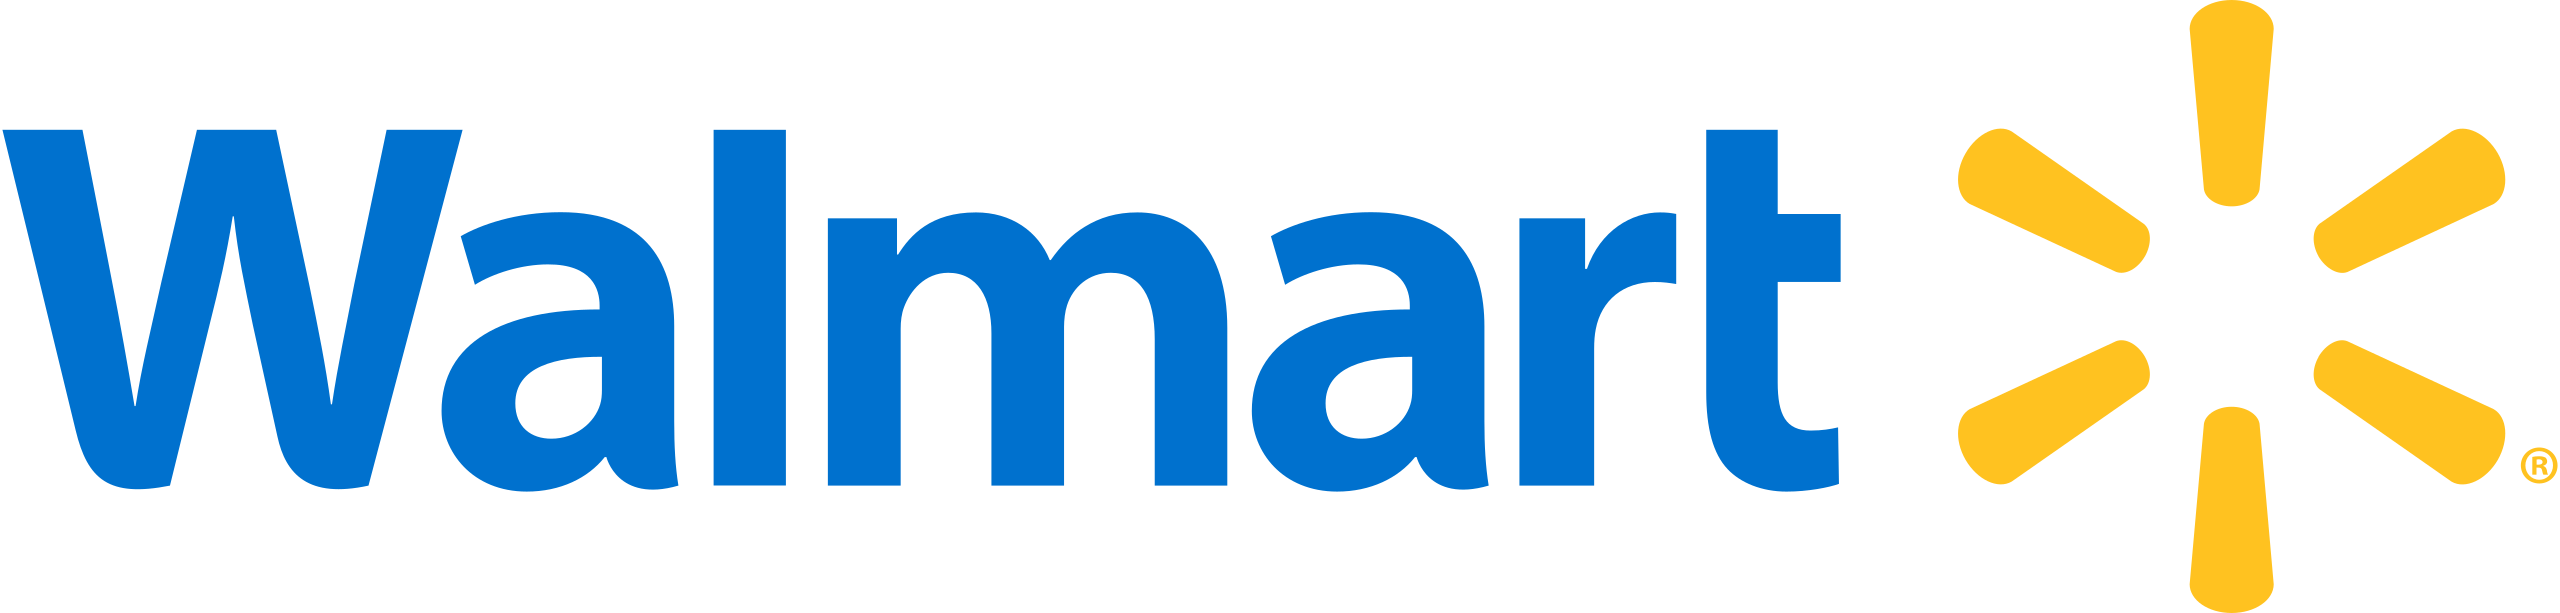

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
walmart_sales_df = pd.read_csv('/content/drive/MyDrive/Walmart_sales.csv',parse_dates=["Date"])
walmart_sales_df.head()

Mounted at /content/drive


<ipython-input-3-f01ca443c6d0>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  walmart_sales_df = pd.read_csv('/content/drive/MyDrive/Walmart_sales.csv',parse_dates=["Date"])


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


We will begin by inspecting the data for any null values and see if we need to do any data cleaning

In [ ]:
walmart_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [ ]:
walmart_sales_df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
walmart_sales_df.describe().style.background_gradient(cmap='bone_r')

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1046964.877562,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,564366.622054,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,209986.250000,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,553350.105000,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,960746.040000,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1420158.660000,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3818686.450000,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
corr = walmart_sales_df.corr()
corr

<ipython-input-7-44bb19c7a5f0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = walmart_sales_df.corr()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000



The correlation analysis reveals that there are no significant correlations among the columns in the dataset.

<Axes: >

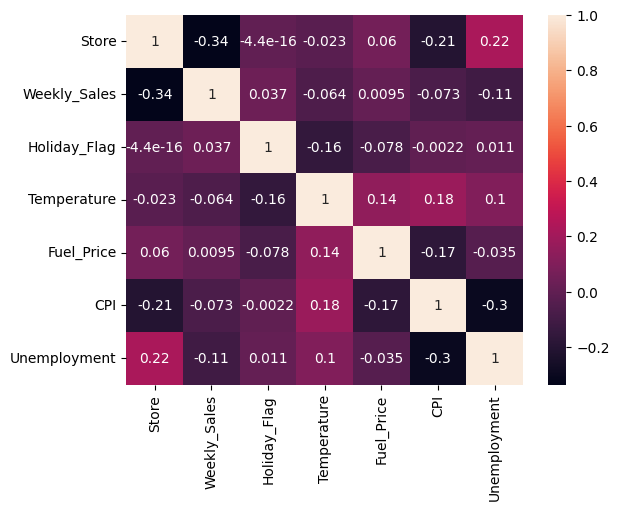

In [ ]:
sns.heatmap(corr, annot=True)

The aim of this project is to gain a better understanding of the impact of various factors on Walmart's weekly sales. We have created four regression scatter plots to visualize this relationship. The y-axis of all four plots represents the weekly sales, while the x-axis of the three graphs from left to right represents Temperature, Fuel Price, Unemployment, and CPI. After analyzing the scatter plots, we found that there is no strong correlation between weekly sales and these factors.

Text(0.5, 1.0, 'Weekly Sales vs CPI')

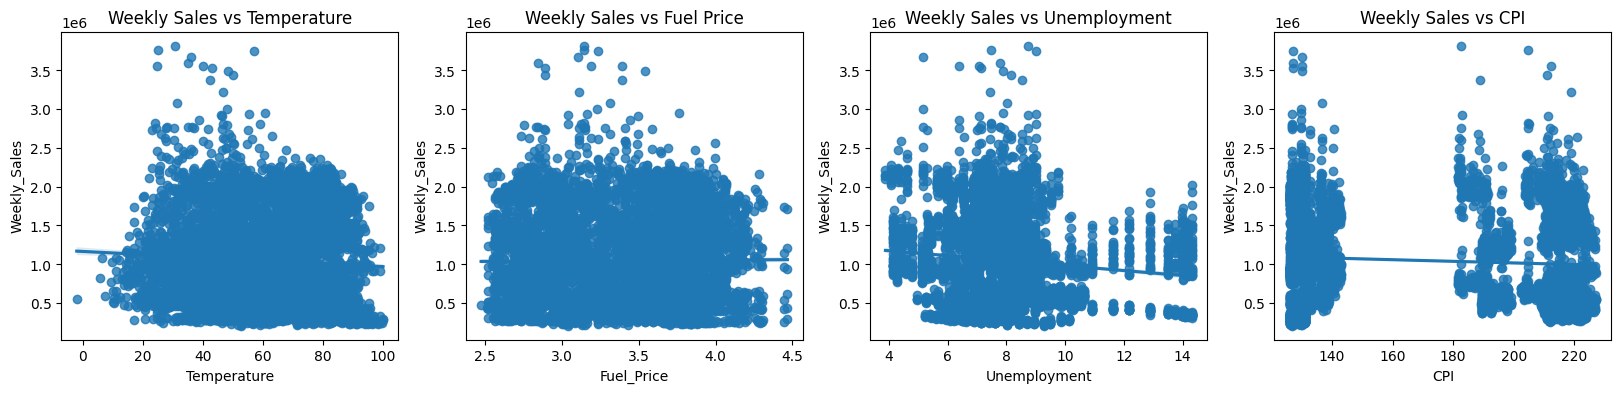

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(20,4))

sns.regplot(data=walmart_sales_df,y="Weekly_Sales",x='Temperature',ax=ax[0])
ax[0].set_title('Weekly Sales vs Temperature')




sns.regplot(data=walmart_sales_df,y="Weekly_Sales",x='Fuel_Price',ax=ax[1])
ax[1].set_title('Weekly Sales vs Fuel Price')



sns.regplot(data=walmart_sales_df,y="Weekly_Sales",x='Unemployment',ax=ax[2])
ax[2].set_title('Weekly Sales vs Unemployment')


sns.regplot(data=walmart_sales_df,y="Weekly_Sales",x='CPI',ax=ax[3])
ax[3].set_title('Weekly Sales vs CPI')

 Below are three histograms for the Fuel Price, Weekly Sales, and Temperature columns. The Fuel Price histogram displays a non-symmetric bimodal distribution, while the Weekly Sales histogram is right-skewed, and the Temperature histogram is left-skewed.

Text(0.5, 1.0, 'Temp Histogram')

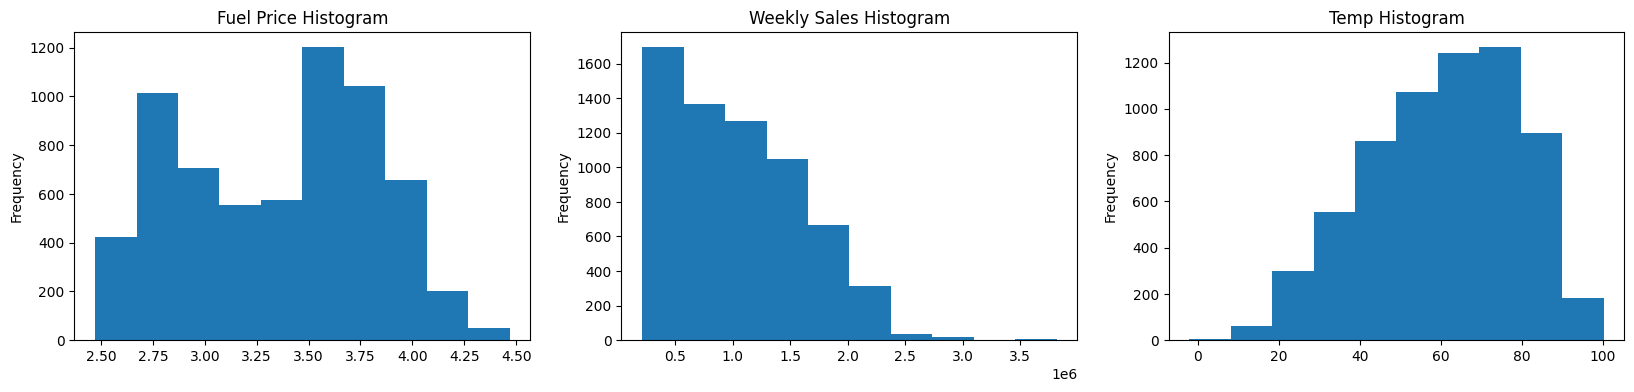

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(20,4))

walmart_sales_df["Fuel_Price"].plot(kind="hist",ax=ax[0])
ax[0].set_title("Fuel Price Histogram")

walmart_sales_df["Weekly_Sales"].plot(kind="hist",ax=ax[1])
ax[1].set_title("Weekly Sales Histogram")

walmart_sales_df["Temperature"].plot(kind="hist",ax=ax[2])
ax[2].set_title("Temp Histogram")



Our analysis has revealed a noteworthy correlation with dates, specifically indicating a recurring trend where weekly sales display a significant increase during the months ranging from October to January every year. This could be becuase of the holidays.

(array([14610., 14730., 14853., 14975., 15095., 15218., 15340., 15461.,
        15584., 15706.]),
 [Text(14610.0, 0, '2010-01'),
  Text(14730.0, 0, '2010-05'),
  Text(14853.0, 0, '2010-09'),
  Text(14975.0, 0, '2011-01'),
  Text(15095.0, 0, '2011-05'),
  Text(15218.0, 0, '2011-09'),
  Text(15340.0, 0, '2012-01'),
  Text(15461.0, 0, '2012-05'),
  Text(15584.0, 0, '2012-09'),
  Text(15706.0, 0, '2013-01')])

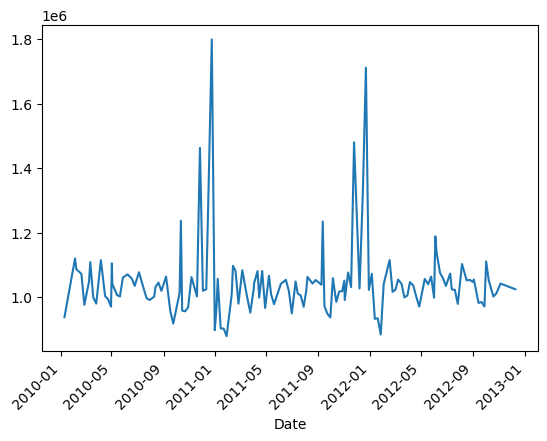

In [ ]:
walmart_sales_df.groupby('Date')['Weekly_Sales'].mean().plot(kind='line')
plt.xticks(rotation=45)


Given the strong correlation identified between holidays and weekly sales, let's delve deeper into our analysis by examining quarterly sales figures for each year. This approach will offer a more nuanced understanding of the seasonal variations and their impact on overall sales trends.

In [ ]:
walmart_sales_df["Quarter"] = walmart_sales_df["Date"].dt.quarter
walmart_sales_df["Month"] = walmart_sales_df["Date"].dt.month
walmart_sales_df["Year"] = walmart_sales_df["Date"].dt.year

In [ ]:
pivot_table = pd.pivot_table(data=walmart_sales_df,index=["Year"],columns=["Quarter"],values=["Weekly_Sales"],aggfunc="sum")
pivot_table

Weekly_Sales                                          
Quarter             1             2             3             4
Year                                                           
2010     4.200530e+08  6.068598e+08  5.485085e+08  7.134649e+08
2011     5.360954e+08  6.019646e+08  6.435744e+08  6.665656e+08
2012     5.457900e+08  6.172141e+08  5.559950e+08  2.811338e+08


The trend of Quarter 4 consistently leading in sales performance, except for the anomaly observed in 2012, is a strong validation of our analysis, as demonstrated in our line chart. It reaffirms that during every holiday season, which falls within Quarter 4, there is a notable surge in sales.

<Axes: ylabel='Year'>

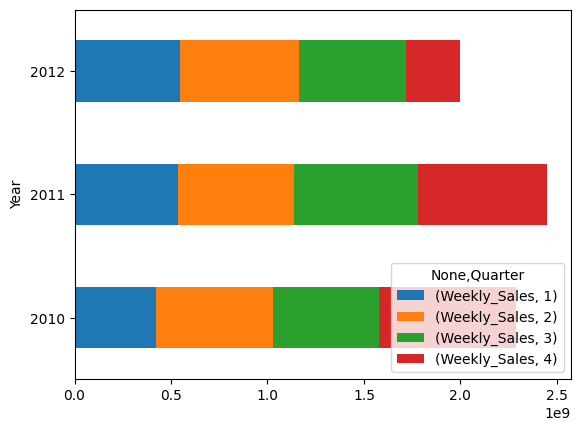

In [ ]:
pivot_table.plot(kind="barh",stacked=True)

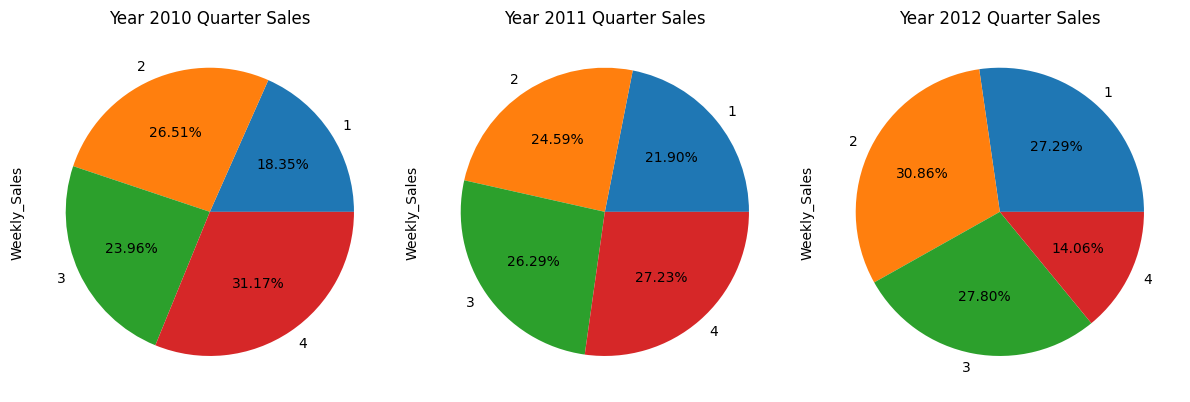

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

for i, year in enumerate(walmart_sales_df["Year"].unique()):
    df = walmart_sales_df[walmart_sales_df["Year"] == year]
    pt = pd.pivot_table(df, index="Quarter", values="Weekly_Sales", aggfunc="sum")
    pt = pt.squeeze()
    pt.plot(kind="pie", autopct='%1.2f%%', ax=ax[i], legend=None)
    ax[i].set_title(f"Year {year} Quarter Sales")

plt.tight_layout()
plt.show()

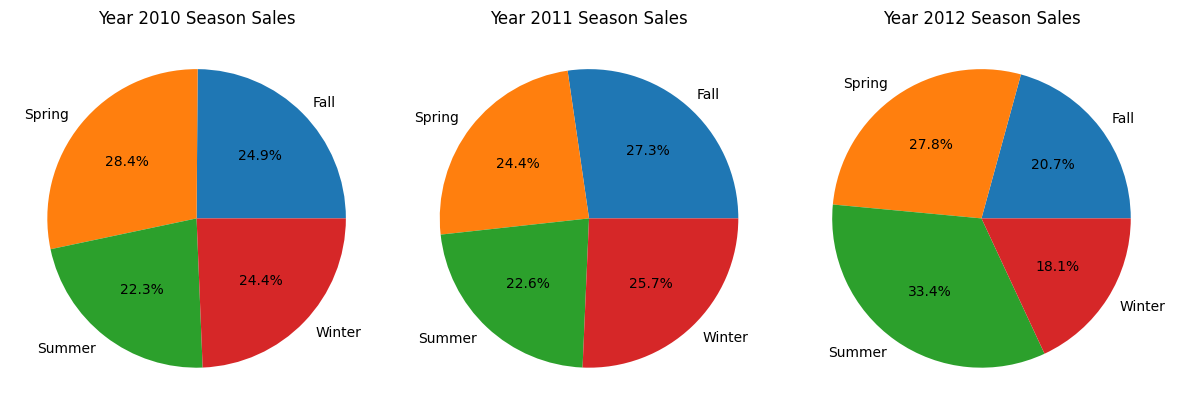

In [ ]:
def get_season(month):
    if month in (3, 4, 5):
        return 'Spring'
    elif month in (6, 7, 8):
        return 'Summer'
    elif month in (9, 10, 11):
        return 'Fall'
    elif month in (12, 1, 2):
        return 'Winter'


walmart_sales_df["Season"] = walmart_sales_df["Month"].apply(get_season)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

for i, year in enumerate(walmart_sales_df["Year"].unique()):
    df = walmart_sales_df[walmart_sales_df["Year"] == year]
    pt = pd.pivot_table(df, index="Season", values="Weekly_Sales", aggfunc="sum")
    pt = pt.squeeze()

    # Create pie chart using Seaborn
    sns.set_palette("pastel")
    ax[i].pie(pt, labels=pt.index, autopct='%1.1f%%')
    ax[i].set_title(f"Year {year} Season Sales")

plt.tight_layout()
plt.show()

Displayed below is a bar chart presenting store numbers on the x-axis and corresponding sales volumes on the y-axis. Our analysis reveals that Store 20 stands out as the busiest, with sales exceeding $300,000,000. On the opposite of the spectrum, the store with the least sales was store 33. Sales at store 33 did not exceed \$50,000,0000.


<Axes: xlabel='Store'>

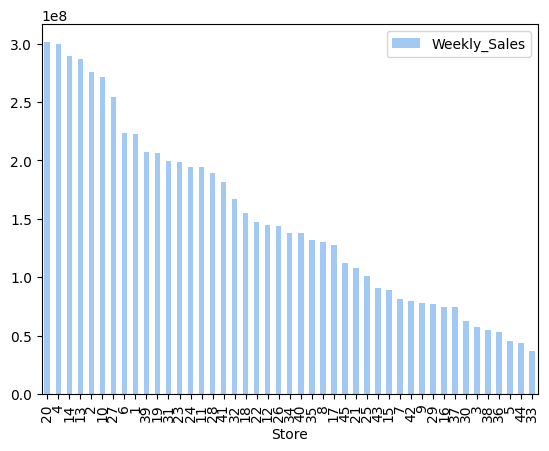

In [ ]:
pd.pivot_table(walmart_sales_df, index ="Store", values = "Weekly_Sales", aggfunc=np.sum).sort_values(by="Weekly_Sales",ascending=False).plot(kind="bar")


In [29]:
median = walmart_sales_df["Weekly_Sales"].median()
mean = walmart_sales_df["Weekly_Sales"].mean()
std = walmart_sales_df["Weekly_Sales"].std()

text = "The {} of the sales is {:,.2f}"


print(text.format("median", median))
print(text.format("mean", mean))
print(text.format("standard deviation", std))

The median of the sales is 960,746.04
The mean of the sales is 1,046,964.88
The standard deviation of the sales is 564,366.62



After conducting a comprehensive analysis of Walmart's weekly sales data, several key insights have emerged:

**Correlation Analysis**: The correlation analysis indicates that no significant correlations exist among the various factors examined in the dataset. This suggests that weekly sales are not strongly influenced by individual factors such as temperature, fuel prices, unemployment, or CPI.

**Seasonal Trends**: However, there are noteworthy correlations concerning dates, particularly highlighting a recurring trend of increased weekly sales during the holiday months spanning from October to January each year. This pattern underscores the influence of holidays on consumer behavior and purchasing patterns.

**Quarterly Sales Performance**: Further analysis focusing on quarterly sales figures corroborates the seasonal variations observed, with Quarter 4 consistently leading in sales performance. Despite occasional anomalies, such as the deviation observed in 2012, the overall trend reinforces the significance of holiday seasons in driving heightened sales activity.

**Store-Specific Insights**: Examination of individual store sales volumes reveals distinct patterns, with Store 20 emerging as the busiest outlet, boasting sales exceeding $300,000,000. Conversely, Store 33 exhibits relatively lower sales, not surpassing $50,000,000, underscoring the variability in performance across different store locations.

**Statistical Summary**: The statistical summary of sales data indicates a median weekly sales figure of $960,746.04, a mean of $1,046,964.88, and a standard deviation of $564,366.62. These metrics provide a comprehensive overview of the central tendency and dispersion of sales data.

In conclusion, while individual factors may not exert a significant influence on weekly sales, the analysis highlights the pronounced impact of seasonal trends and holidays on consumer spending behavior. Understanding these dynamics can inform strategic decision-making and resource allocation to capitalize on peak sales periods and enhance overall performance.